### Missing Data

In [7]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 8 

random_matrix = np.random.randint(1, 10, size=(n,n))
random_matrix

array([[7, 4, 8, 5, 7, 3, 7, 8],
       [5, 4, 8, 8, 3, 6, 5, 2],
       [8, 6, 2, 5, 1, 6, 9, 1],
       [3, 7, 4, 9, 3, 5, 3, 7],
       [5, 9, 7, 2, 4, 9, 2, 9],
       [5, 2, 4, 7, 8, 3, 1, 4],
       [2, 8, 4, 2, 6, 6, 4, 6],
       [2, 2, 4, 8, 7, 9, 8, 5]])

In [20]:
index = np.random.choice(random_matrix.size, 10, replace=False) #Replace means sampling without replacement we do not replace the index random chooses
index

array([15, 34, 56, 61, 37, 47, 51, 19, 55, 40])

In [21]:
random_matrix.ravel()

array([7, 4, 8, 5, 7, 3, 7, 8, 5, 4, 8, 8, 3, 6, 5, 2, 8, 6, 2, 5, 1, 6,
       9, 1, 3, 7, 4, 9, 3, 5, 3, 7, 5, 9, 7, 2, 4, 9, 2, 9, 5, 2, 4, 7,
       8, 3, 1, 4, 2, 8, 4, 2, 6, 6, 4, 6, 2, 2, 4, 8, 7, 9, 8, 5])

In [26]:
#need to convert our random_matrix into float
random_matrix = random_matrix*1.0
random_matrix.ravel()[index] = None
random_matrix


array([[ 7.,  4.,  8.,  5.,  7.,  3.,  7.,  8.],
       [ 5.,  4.,  8.,  8.,  3.,  6.,  5., nan],
       [ 8.,  6.,  2., nan,  1.,  6.,  9.,  1.],
       [ 3.,  7.,  4.,  9.,  3.,  5.,  3.,  7.],
       [ 5.,  9., nan,  2.,  4., nan,  2.,  9.],
       [nan,  2.,  4.,  7.,  8.,  3.,  1., nan],
       [ 2.,  8.,  4., nan,  6.,  6.,  4., nan],
       [nan,  2.,  4.,  8.,  7., nan,  8.,  5.]])

In [30]:
scores = pd.DataFrame(random_matrix, 
             columns=[f"Round {i}" for i in range(1, 9)], 
             index=[f"Player {i}" for i in range(1,9)],
             )

scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,7.0,8.0
Player 2,5.0,4.0,8.0,8.0,3.0,6.0,5.0,NaN
Player 3,8.0,6.0,2.0,NaN,1.0,6.0,9.0,1.0
Player 4,3.0,7.0,4.0,9.0,3.0,5.0,3.0,7.0
Player 5,5.0,9.0,NaN,2.0,4.0,NaN,2.0,9.0
Player 6,NaN,2.0,4.0,7.0,8.0,3.0,1.0,NaN
Player 7,2.0,8.0,4.0,NaN,6.0,6.0,4.0,NaN
Player 8,NaN,2.0,4.0,8.0,7.0,NaN,8.0,5.0


In [33]:
scores.isnull()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,False,False,False,False,False,False,False,False
Player 2,False,False,False,False,False,False,False,True
Player 3,False,False,False,True,False,False,False,False
Player 4,False,False,False,False,False,False,False,False
Player 5,False,False,True,False,False,True,False,False
Player 6,True,False,False,False,False,False,False,True
Player 7,False,False,False,True,False,False,False,True
Player 8,True,False,False,False,False,True,False,False


In [35]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, Player 1 to Player 8
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Round 1  6 non-null      float64
 1   Round 2  8 non-null      float64
 2   Round 3  7 non-null      float64
 3   Round 4  6 non-null      float64
 4   Round 5  8 non-null      float64
 5   Round 6  6 non-null      float64
 6   Round 7  8 non-null      float64
 7   Round 8  5 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [36]:
#All rows that contains atleast 1 null will be removed
scores.dropna()

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,7.0,8.0
Player 4,3.0,7.0,4.0,9.0,3.0,5.0,3.0,7.0


In [38]:
scores.dropna(axis='columns')

,Round 2,Round 5,Round 7
Player 1,4.0,7.0,7.0
Player 2,4.0,3.0,5.0
Player 3,6.0,1.0,9.0
Player 4,7.0,3.0,3.0
Player 5,9.0,4.0,2.0
Player 6,2.0,8.0,1.0
Player 7,8.0,6.0,4.0
Player 8,2.0,7.0,8.0


In [41]:
#
scores = scores.fillna(0)
scores

,Round 1,Round 2,Round 3,Round 4,Round 5,Round 6,Round 7,Round 8
Player 1,7.0,4.0,8.0,5.0,7.0,3.0,7.0,8.0
Player 2,5.0,4.0,8.0,8.0,3.0,6.0,5.0,0.0
Player 3,8.0,6.0,2.0,0.0,1.0,6.0,9.0,1.0
Player 4,3.0,7.0,4.0,9.0,3.0,5.0,3.0,7.0
Player 5,5.0,9.0,0.0,2.0,4.0,0.0,2.0,9.0
Player 6,0.0,2.0,4.0,7.0,8.0,3.0,1.0,0.0
Player 7,2.0,8.0,4.0,0.0,6.0,6.0,4.0,0.0
Player 8,0.0,2.0,4.0,8.0,7.0,0.0,8.0,5.0


In [44]:
scores.describe().T

,count,mean,std,min,25%,50%,75%,max
Round 1,8.0,3.750,3.011881,0.0,1.50,4.0,5.50,8.0
Round 2,8.0,5.250,2.659216,2.0,3.50,5.0,7.25,9.0
Round 3,8.0,4.250,2.712405,0.0,3.50,4.0,5.00,8.0
Round 4,8.0,4.875,3.720119,0.0,1.50,6.0,8.00,9.0
Round 5,8.0,4.875,2.474874,1.0,3.00,5.0,7.00,8.0
Round 6,8.0,3.625,2.559994,0.0,2.25,4.0,6.00,6.0
Round 7,8.0,4.875,2.900123,1.0,2.75,4.5,7.25,9.0
Round 8,8.0,3.750,3.918819,0.0,0.00,3.0,7.25,9.0


In [47]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<Axes: xlabel='age', ylabel='Count'>

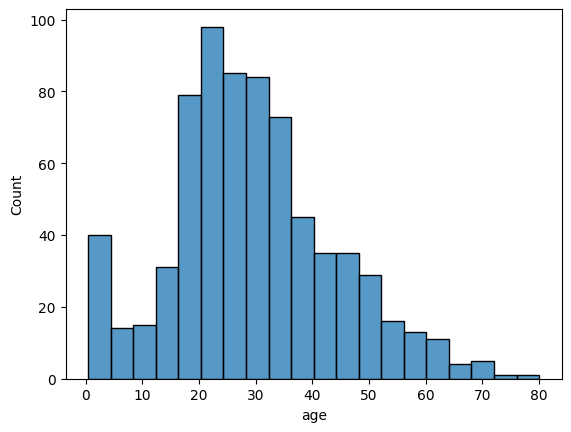

In [49]:
sns.histplot(titanic, x="age")

<Axes: xlabel='age', ylabel='Count'>

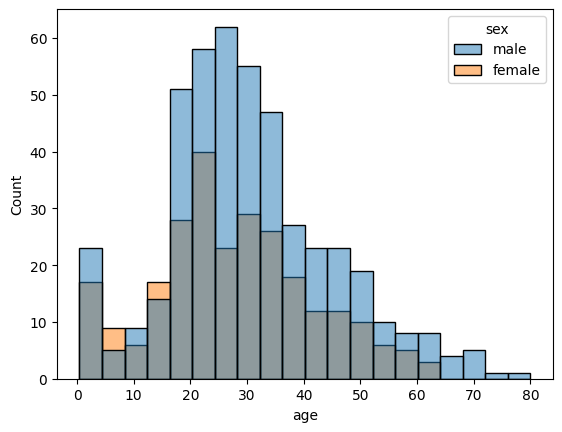

In [50]:
sns.histplot(titanic, x="age", hue="sex")

### We have talked to a historian that advices us to take the median age of each group (Male, Female) to impute the missing values. 

In [65]:
median_male_age = titanic[titanic["sex"] == "male"]["age"].median()
median_female_age = titanic[titanic["sex"] == "female"]["age"].median()

median_female_age, median_male_age

(27.0, 29.0)

In [68]:
titanic.loc[titanic["sex"] == "male", "age"] = titanic.loc[titanic["sex"] == "male", "age"].fillna(median_male_age)

In [70]:
titanic.loc[titanic["age"] == 29, "sex"].value_counts()

sex
male      137
female      7
Name: count, dtype: int64

In [71]:
titanic.loc[titanic["sex"] == "famale", "age"] = titanic.loc[titanic["sex"] == "female", "age"].fillna(median_female_age)

In [73]:
titanic.loc[titanic["age"] == 27, "sex"].value_counts()

sex
male      12
female     6
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='Count'>

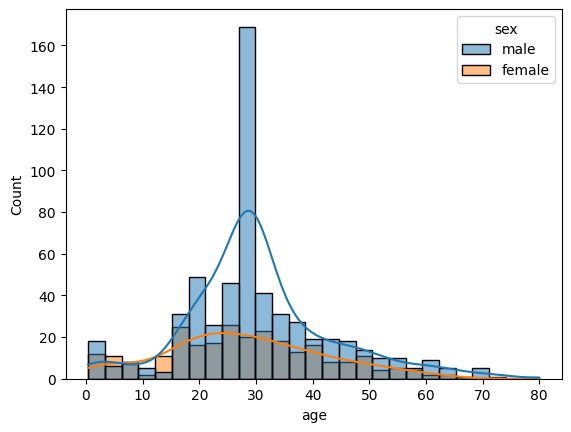

In [75]:
sns.histplot(data=titanic, x="age", kde=True, hue="sex")

### Aggregations and groupby


In [77]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [80]:
titanic.groupby("sex")[["survived", "age"]].mean()

,survived,age
sex,,
female,0.742038,27.915709
male,0.188908,30.355581


In [81]:
titanic.groupby("class")[["age", "fare"]].max()

C:\Users\Noah7\AppData\Local\Temp\ipykernel_19216\55204569.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("class")[["age", "fare"]].max()


,age,fare
class,,
First,80.0,512.3292
Second,70.0,73.5000
Third,74.0,69.5500


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Survival count in titanic vs class')]

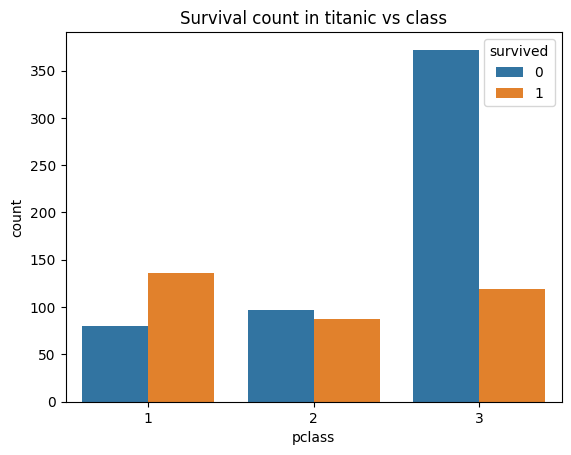

In [86]:
survived_class = titanic.groupby(["survived", "pclass"]).count().reset_index()
ax = sns.barplot(data=survived_class, x="pclass", y="sex", hue="survived")
ax.set(ylabel="count", title="Survival count in titanic vs class")